In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
albuquerque_population_data = pd.read_csv("../demand_influx_data/resident_population_albuquerque.csv")
seattle_population_data = pd.read_csv("../demand_influx_data/resident_population_seattle.csv")

In [132]:
import scipy.optimize as opt

def f(x, a, b, c):
    return a / (1 + np.exp(-b * (x))) + c

popt, pcov = opt.curve_fit(f, np.array(range(len(albuquerque_population_data))), albuquerque_population_data["ABQPOP"].values, method="trf")
y_fit = f(np.array(range(len(albuquerque_population_data))), *popt)

<ipython-input-132-0bfc1fd49341>:4: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x))) + c


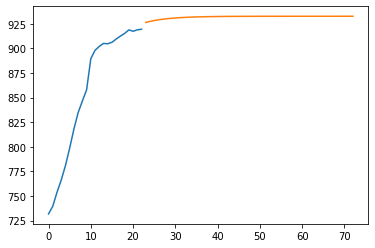

In [133]:
plt.plot(range(len(albuquerque_population_data)), albuquerque_population_data["ABQPOP"].values)
plt.plot(range(len(albuquerque_population_data), len(albuquerque_population_data)+50), [f(x, popt[0], popt[1], popt[2]) for x in range(len(albuquerque_population_data), len(albuquerque_population_data)+50)])

In [138]:
albuquerque_pop_data = pd.DataFrame({
    "year" : list(range(2023, 2073)),
    "population" : [1000 * f(x, popt[0], popt[1], popt[2]) for x in range(len(albuquerque_population_data), len(albuquerque_population_data)+50)]
})

albuquerque_pop_data.to_csv("albuquerque_population_data.csv", index=False)

In [139]:
import scipy.optimize as opt

def f(x, a, b, c):
    return a / (1 + np.exp(-b * (x))) + c

popt, pcov = opt.curve_fit(f, np.array(range(len(seattle_population_data))), seattle_population_data["STWPOP"].values, method="trf", maxfev=5000)
y_fit = f(np.array(range(len(seattle_population_data))), *popt)

<ipython-input-139-3ca56337f4b8>:4: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x))) + c


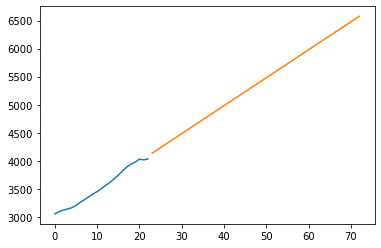

In [140]:
plt.plot(range(len(seattle_population_data)), seattle_population_data["STWPOP"].values)
plt.plot(range(len(seattle_population_data), len(seattle_population_data)+50), [f(x, popt[0], popt[1], popt[2]) for x in range(len(seattle_population_data), len(seattle_population_data)+50)])

In [141]:
seattle_pop_data = pd.DataFrame({
    "year" : list(range(2023, 2073)),
    "population" : [1000 * f(x, popt[0], popt[1], popt[2]) for x in range(len(seattle_population_data), len(seattle_population_data)+50)]
})

seattle_pop_data.to_csv("seattle_population_data.csv", index=False)